In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "dataset/review.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,restaurant_name,name,rating,review
0,Merr Kayu Manis Restaurant,Erik Widiyanto (AKIM),5.0,"This is small foodcourt, they have several pop..."
1,Merr Kayu Manis Restaurant,Frieddy Kurniawan,5.0,This restaurant provide many kind of famous fo...
2,Merr Kayu Manis Restaurant,Alvin Jusuf,4.0,"The place not bad, also the foods pretty good ..."
3,Merr Kayu Manis Restaurant,Yoseph J,5.0,"Price is really cheap, food was great. Ambienc..."
4,Merr Kayu Manis Restaurant,Bill,3.0,"The food was normal, some are good some are ba..."


In [3]:
df.drop(columns = ['restaurant_name', 'name'], inplace = True)
df.columns = ['rating', 'review']
df.head()

,rating,review
0,5.0,"This is small foodcourt, they have several pop..."
1,5.0,This restaurant provide many kind of famous fo...
2,4.0,"The place not bad, also the foods pretty good ..."
3,5.0,"Price is really cheap, food was great. Ambienc..."
4,3.0,"The food was normal, some are good some are ba..."


# EDA

In [4]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"1.0 = {len(df[df['rating'] == 1.0])} rows")
print(f"2.0 = {len(df[df['rating'] == 2.0])} rows")
print(f"3.0 = {len(df[df['rating'] == 3.0])} rows")
print(f"4.0 = {len(df[df['rating'] == 4.0])} rows")
print(f"5.0 = {len(df[df['rating'] == 5.0])} rows")

Input data has 250 rows and 2 columns
1.0 = 9 rows
2.0 = 5 rows
3.0 = 35 rows
4.0 = 83 rows
5.0 = 118 rows


Number of null in label: 0
Number of null in text: 0


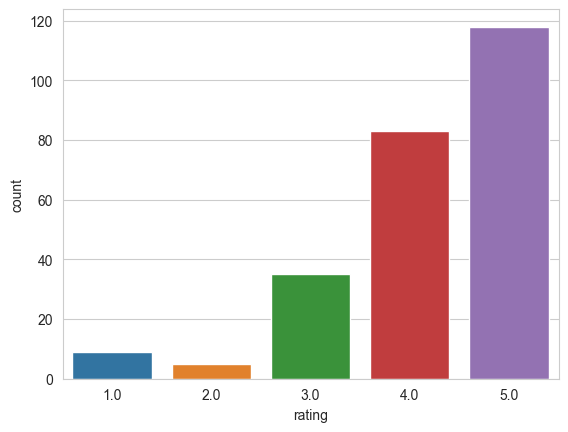

In [5]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['rating'].isnull().sum()))
print("Number of null in text: {}".format(df['review'].isnull().sum()))
sns.countplot(x='rating', data=df);

## Visualizing Word Clouds

In [8]:
df_ham = df[(df['rating'] == 5.0) | (df['rating'] == 4.0) | (df['rating'] == 3.0)]
df_spam = df[(df['rating'] == 2.0) | (df['rating'] == 1.0)]
#convert to list
ham_list=df_ham['review'].tolist()
spam_list= df_spam['review'].tolist()
filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()
filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

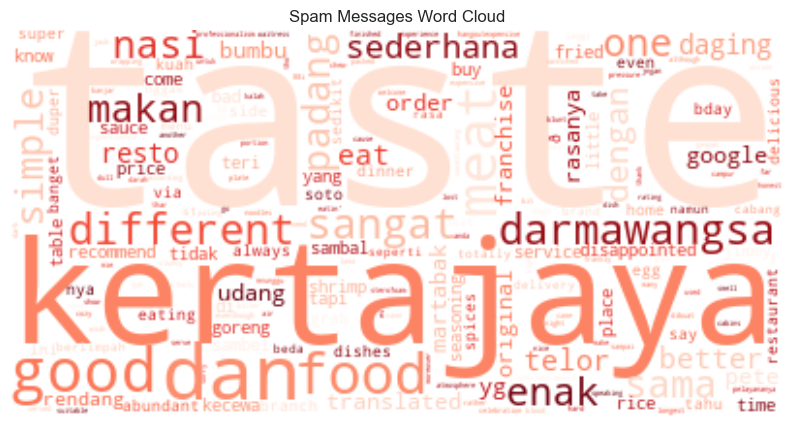

In [9]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Spam Messages Word Cloud")
plt.show()

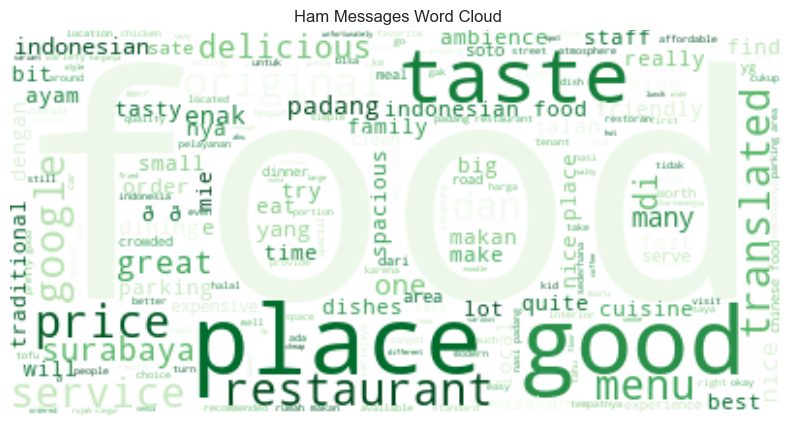

In [10]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ham Messages Word Cloud")
plt.show()

# Preprocessing the data
## Cleaning the text

In [11]:
import string
import re

In [12]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['rating'].map({5.0:0, 4.0:0, 3.0:0, 2.0:1, 1.0:1})

### Adding additional features - length of, and percentage of punctuations in the text

In [14]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['text_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct
0,5.0,"This is small foodcourt, they have several pop...",this is small foodcourt they have several pop...,0,218,6.4
1,5.0,This restaurant provide many kind of famous fo...,this restaurant provide many kind of famous fo...,0,314,2.9
2,4.0,"The place not bad, also the foods pretty good ...",the place not bad also the foods pretty good ...,0,91,3.3
3,5.0,"Price is really cheap, food was great. Ambienc...",price is really cheap food was great ambienc...,0,228,3.5
4,3.0,"The food was normal, some are good some are ba...",the food was normal some are good some are ba...,0,138,4.3


## Tokenization

In [15]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct,tokens
0,5.0,"This is small foodcourt, they have several pop...",this is small foodcourt they have several pop...,0,218,6.4,"[this, is, small, foodcourt, they, have, sever..."
1,5.0,This restaurant provide many kind of famous fo...,this restaurant provide many kind of famous fo...,0,314,2.9,"[this, restaurant, provide, many, kind, of, fa..."
2,4.0,"The place not bad, also the foods pretty good ...",the place not bad also the foods pretty good ...,0,91,3.3,"[the, place, not, bad, also, the, foods, prett..."
3,5.0,"Price is really cheap, food was great. Ambienc...",price is really cheap food was great ambienc...,0,228,3.5,"[price, is, really, cheap, food, was, great, a..."
4,3.0,"The food was normal, some are good some are ba...",the food was normal some are good some are ba...,0,138,4.3,"[the, food, was, normal, some, are, good, some..."


## Lemmatization and Removing Stopwords

In [27]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\syahf\AppData\Roaming\nltk_data...


In [28]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,5.0,"This is small foodcourt, they have several pop...",this is small foodcourt they have several pop...,0,218,6.4,"[this, is, small, foodcourt, they, have, sever...",small foodcourt several popular food tenant su...
1,5.0,This restaurant provide many kind of famous fo...,this restaurant provide many kind of famous fo...,0,314,2.9,"[this, restaurant, provide, many, kind, of, fa...",restaurant provide many kind famous food surab...
2,4.0,"The place not bad, also the foods pretty good ...",the place not bad also the foods pretty good ...,0,91,3.3,"[the, place, not, bad, also, the, foods, prett...",place not bad also food pretty good price stan...
3,5.0,"Price is really cheap, food was great. Ambienc...",price is really cheap food was great ambienc...,0,228,3.5,"[price, is, really, cheap, food, was, great, a...",price really cheap food great ambience great s...
4,3.0,"The food was normal, some are good some are ba...",the food was normal some are good some are ba...,0,138,4.3,"[the, food, was, normal, some, are, good, some...",food normal good bad safe bet dont buy weird o...


# Feature Extraction from Text
## Bag-Of-Words Model

In [29]:
X = df[['lemmatized_text', 'text_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535
0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345297,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.440610,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0

# Training different Classification models

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       0.00      0.00      0.00         4

    accuracy                           0.95        75
   macro avg       0.47      0.50      0.49        75
weighted avg       0.90      0.95      0.92        75



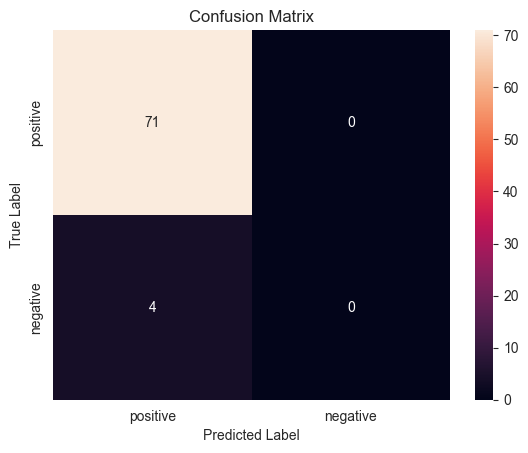

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       0.00      0.00      0.00         4

    accuracy                           0.95        75
   macro avg       0.47      0.50      0.49        75
weighted avg       0.90      0.95      0.92        75



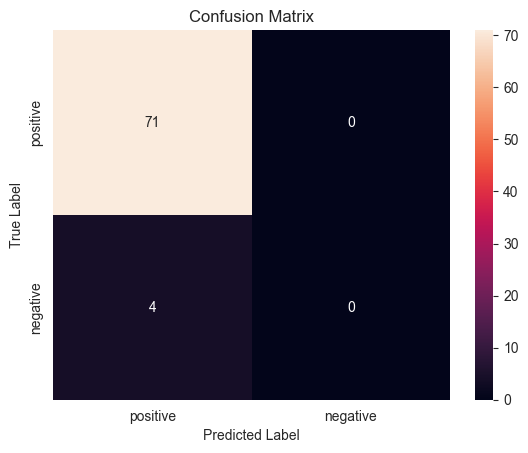

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.00      0.00      0.00         4

    accuracy                           0.93        75
   macro avg       0.47      0.49      0.48        75
weighted avg       0.90      0.93      0.91        75



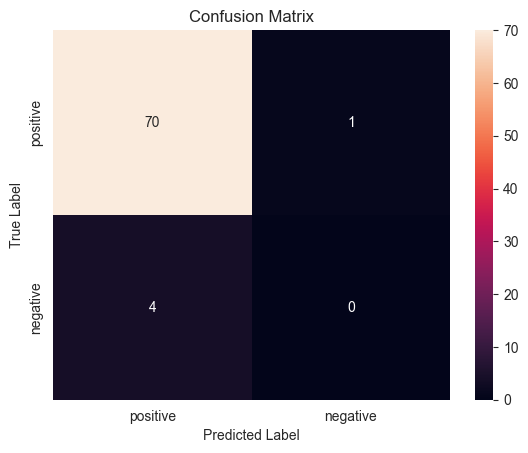

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       0.00      0.00      0.00         4

    accuracy                           0.95        75
   macro avg       0.47      0.50      0.49        75
weighted avg       0.90      0.95      0.92        75



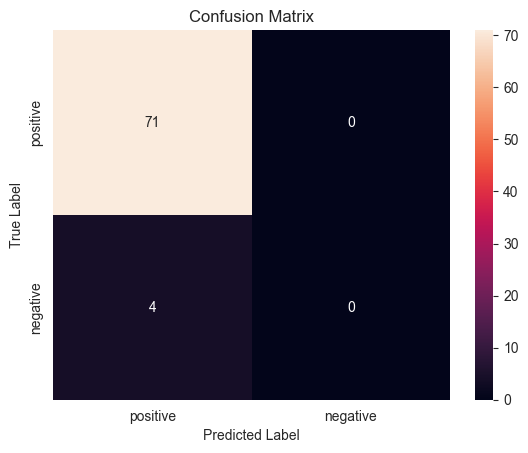

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       0.00      0.00      0.00         4

    accuracy                           0.95        75
   macro avg       0.47      0.50      0.49        75
weighted avg       0.90      0.95      0.92        75



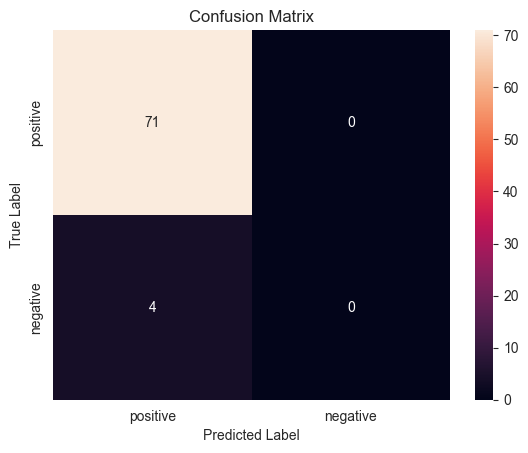

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.
At this point, it might be worth to perform k-fold cross validation on each of these to estimate their skill on unseen data.

In [38]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), RandomForestClassifier(n_estimators = 150), SVC(kernel = 'linear')]
names = ["Logistic Regression", "Random Forest", "SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")

Logistic Regression
 accuracy - 0.9428104575163399 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 
Random Forest
 accuracy - 0.9428104575163399 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 
SVM
 accuracy - 0.9428104575163399 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 


In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9466666666666667